## Intro to Google Colab 

Google Colab is a online, free web-hosted Jupyter Notebook service. It is good for basic python code and analysis. It is not good for super complex packages. It also needs internet (won't be great on a ship, the wilderness, etc.). This notebook will be more about blasting though using Colab, than learning the tools. We will get to the tools soon!

### Let's try some python

(shift enter runs a cell on a mac, and probably windows as well)

In [5]:
2+2

4

In [6]:
print('hello world')

hello world


Whoo! Just did some python without having to install anything! 

### Packages 

Packages are similar to Matlab toolboxes. You import them in a line of code in your notebook. 

In [0]:
import matplotlib.pyplot as plt

Ok, so we are telling the computer everytime we want to use the pyplot function from matplotlib, and we are going to call it plt as it's way shorter. Programmers are lazy. 

In [0]:
import pandas as pd
import numpy as np

Importing a few other that I use in (almost) every project. We can import them normally becuase Google pre-loaded them. Google does not pre-load everything that you need, sometimes you might need to install it. *warning* not every package can easily be imported in Colab. I have not figured out what makes some go and some not. But stats and plotting is usually pretty safe. Niche, one off, old, academic code, less so. 

In [9]:
!pip install lasio

Just installed the lasio package using pip. Lasio is a .las file imput and output reader. It's a great way to read in a .las file (well logs, not LiDAR) to use in python. After installing it, you still need to import it.

In [0]:
import lasio

## Importing Data

Being a google product, the best way to get data into a notebook is in google drive. 

In [11]:
ls

sample_data/


When you do the ls unix command, it lists all the files in the folder. At this point you might ask what is the sample_data/ folder. It's a grab bag of sample data that google has put out. But we want to work with our data! 

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [13]:
ls

gdrive/  sample_data/


cd is change directory in unix land, might have to change where this points

In [14]:
cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


ls is list everything in a folder, hopefully you spot a .las file ...

In [15]:
ls

 0_Intro_To_Using_Colab.ipynb   clustering_TF2_GCP.ipynb
 4900722147_722147B.las        'Copy of clustering_TEST_GCP_TF1.ipynb'
'B Romans - Intro.ipynb'


In [0]:
las = lasio.read('4900722147_722147B.las')

We just read in a las file! Let's do a quick quaility control, and make some plots.

In [17]:
las.curves

[CurveItem(mnemonic=DEPT, unit=F, value=, descr=DEPTH (BOREHOLE) {F13.5}, original_mnemonic=DEPT, data.shape=(20587,)),
 CurveItem(mnemonic=AHO10, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A10 {F13.4}, original_mnemonic=AHO10, data.shape=(20587,)),
 CurveItem(mnemonic=AHO20, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A20 {F13.4}, original_mnemonic=AHO20, data.shape=(20587,)),
 CurveItem(mnemonic=AHO30, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A30 {F13.4}, original_mnemonic=AHO30, data.shape=(20587,)),
 CurveItem(mnemonic=AHO60, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A60 {F13.4}, original_mnemonic=AHO60, data.shape=(20587,)),
 CurveItem(mnemonic=AHO90, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A90 {F13.4}, original_mnemonic=AHO90, data.shape=(20587,)),
 CurveItem(mnemonic=BS, unit=IN, value=, descr=Bit Size {F13.4}, original_mnemonic=BS, data.shape=(20587,)),
 CurveItem(mnemonic=CDF, u

Wow, this well has a lot of curves! OK, we are going to make a data frame for the data in the .las file. Data frame's are a great way to store and mess with data in python. We can go over dataframe's for hours, but just trust me ...

In [0]:
df = las.df()

Now I want to inspect the first few rows of the data frame

In [19]:
df.head(3)

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,DPHZ,EHGR,FCD,GR,HCAL,HDRA,HGR,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
DEPT,,,,,,,,,,,,,,,,,,,,,,,,,,,
264.57275,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,714.3266,94.4001,0.0157,-0.51861,-0.5117,62.9528,7.0,57.5765,8.7657,0.8911,61.5717,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.6761,903.50800
264.65608,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,706.3282,94.4001,0.0157,-0.51861,-0.5117,62.9528,7.0,57.5765,8.7657,0.8911,61.5717,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.5199,899.50816
264.73941,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,698.3297,94.4001,0.0157,-0.51861,-0.5117,61.1155,7.0,57.5765,8.7657,0.8911,59.7747,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.3636,895.50832


### Plotting

Ok, so we have loaded the data, and now I want to make some quick plots. Remember that we loaded in matplotlib? We are going to use that now.

Text(0, 0.5, 'Count')

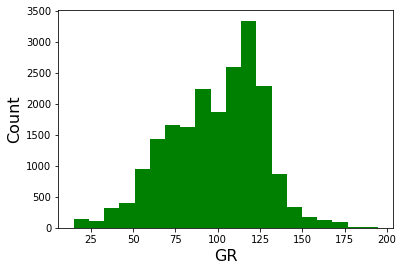

In [20]:
# lets make a histogram of the GR Curve, with 20 bins, in green
plt.hist(df.GR.values, bins = 20, color='g')
plt.xlabel('GR', size=16)
plt.ylabel('Count', size=16)

Text(0, 0.5, 'Deep Resistivity')

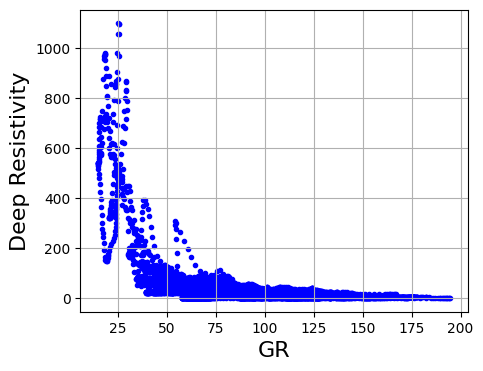

In [21]:
# Scatter plot comparing GR to Deep Resistivity
plt.figure(figsize=(5,4), dpi=100)
plt.scatter(df.GR.values,df.AHO90.values,color='blue', marker='.')

plt.grid(True)
plt.xlabel('GR', size=16)
plt.ylabel('Deep Resistivity', size=16)

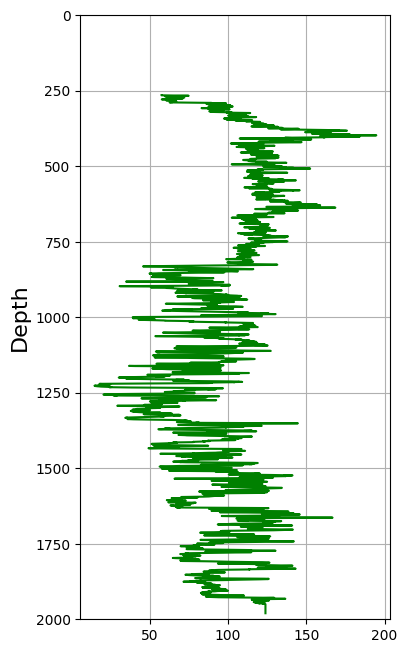

In [23]:
# line plot of the Gamma curve
plt.figure(figsize=(4,8), dpi=100)
plt.plot(df.GR.values, df.index, color='g')
plt.ylabel('Depth', size=16)
plt.ylim(2000,0)
plt.grid(True)


*Fin!*